<a href="https://colab.research.google.com/github/Boskabadi/Boskabadi/blob/main/QNNR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
pip install qiskit qiskit_algorithms --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 5.1 MB/s eta 0:00:00


In [11]:
pip install qiskit qiskit_machine_learning --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512610 sha256=b4c762761a1475b0f298ad2b7ec09f08ed92df6745fb70ac3116ac05d2d67c90
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.circuit.library import QNNCircuit

algorithm_globals.random_seed = 42

In [61]:
X = [27.5416565, 27.5416565, 27.5416565, 27.5416565, 28.0684853, 28.5956326, 28.5956326, 28.5956326, 28.5956326, 28.5956326, 28.5956326, 29.0959396]
y_data = [84.8009949, 84.913147, 85.1294251, 85.1294251, 85.233551, 85.233551, 85.233551, 85.3537064, 85.4738617, 85.5779953, 85.6821289, 85.7862625]

X = np.array(X)
X = X[:, np.newaxis]
y = np.array(y_data)
#num_samples = 20
#eps = 0.2
#lb, ub = -np.pi, np.pi
#X_ = np.linspace(lb, ub, num=50).reshape(50, 1)
#f = lambda x: np.sin(x)

#X = (ub - lb) * algorithm_globals.random.random([num_samples, 1]) + lb
#y = f(X[:, 0]) + eps * (2 * algorithm_globals.random.random(num_samples) - 1)

#plt.plot(X_, f(X_), "r--")
#plt.plot(X, y, "bo")
#plt.show()

In [62]:
print(X.shape)
print(y.shape)

(12, 1)
(12,)


In [63]:
# construct simple feature map
param_x = Parameter("x")
feature_map = QuantumCircuit(1, name="fm")
feature_map.ry(param_x, 0)

# construct simple ansatz
param_y = Parameter("y")
ansatz = QuantumCircuit(1, name="vf")
ansatz.ry(param_y, 0)

# construct a circuit
qc = QNNCircuit(feature_map=feature_map, ansatz=ansatz)

# construct QNN
regression_estimator_qnn = EstimatorQNN(circuit=qc)

In [64]:
# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [65]:
# construct the regressor from the neural network
regressor = NeuralNetworkRegressor(
    neural_network=regression_estimator_qnn,
    loss="squared_error",
    optimizer=L_BFGS_B(maxiter=5),
    callback=callback_graph,
)

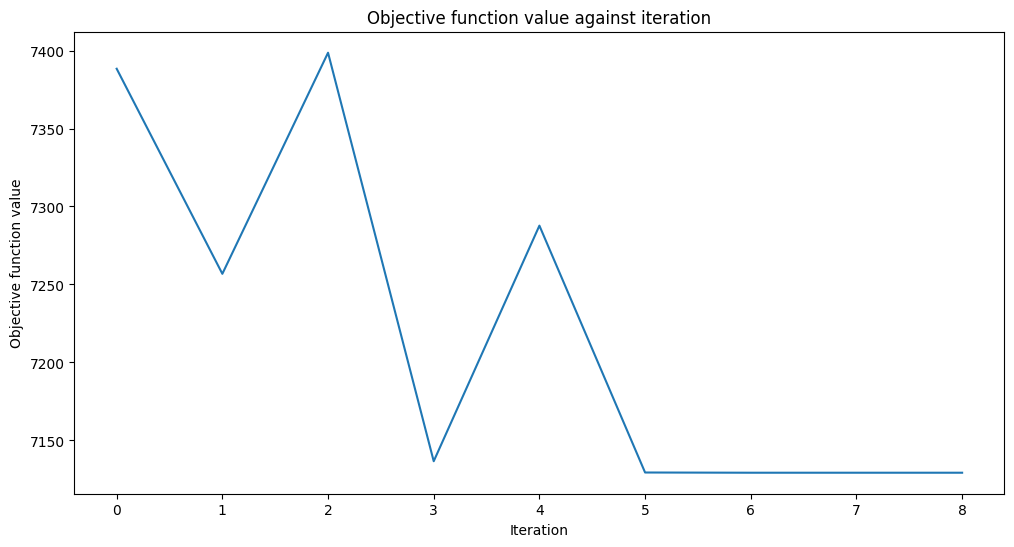

-88862.06423455675

In [66]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit to data
regressor.fit(X, y)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score the result
regressor.score(X, y)

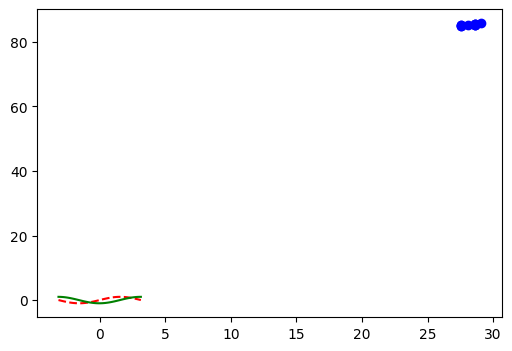

In [67]:
# plot target function
plt.plot(X_, f(X_), "r--")

# plot data
plt.plot(X, y, "bo")

# plot fitted line
y_ = regressor.predict(X_)
plt.plot(X_, y_, "g-")
plt.show()